# 2. Disease prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_disease_prediction = pd.read_csv("cardio_train.csv", sep=";")
df_disease_prediction.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 2.0 - EDA

a)

In [2]:
CD_count = df_disease_prediction["cardio"].value_counts()
print(f"People without cardiovascular disease: {CD_count[0]}")
print(f"People with cardiovascular disease: {CD_count[1]}")

People without cardiovascular disease: 35021
People with cardiovascular disease: 34979


b)

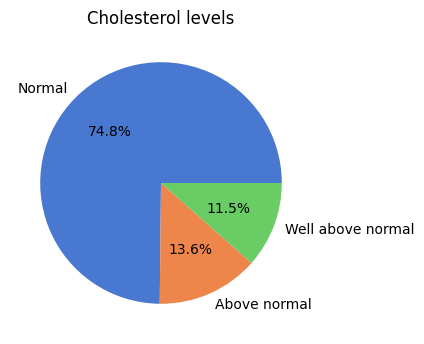

In [3]:
cholesterol_count = df_disease_prediction["cholesterol"].value_counts()
cholesterol_lables = ["Normal", "Above normal", "Well above normal"]
fig, ax = plt.subplots(dpi=100, facecolor='white')
ax.pie(cholesterol_count, 
        autopct = "%1.1f%%", 
        labels = cholesterol_lables, 
        colors = sns.color_palette('muted')
)
ax.set(title = "Cholesterol levels");

c)

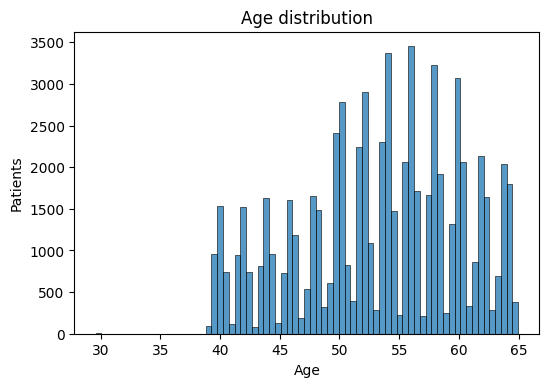

In [4]:
age = df_disease_prediction["age"] / 365

ax, fig = plt.subplots(dpi = 100)
ax = sns.histplot(age)
ax.set(title = "Age distribution", xlabel = "Age", ylabel = "Patients");

d)

In [5]:
smokers = df_disease_prediction["smoke"].value_counts()[1] / df_disease_prediction["smoke"].value_counts().sum()
print(f"{smokers * 100:.2f}% of the patients are smokers")

8.81% of the patients are smokers


e)

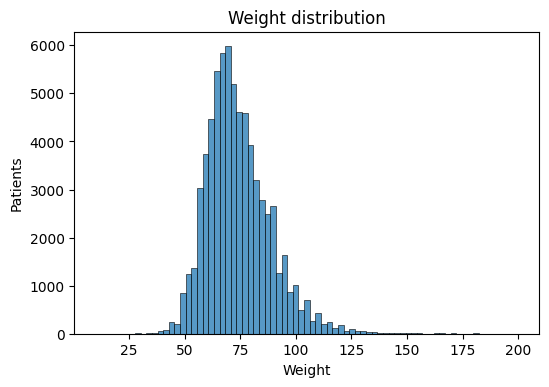

In [6]:
ax, fig = plt.subplots(dpi = 100)
ax = sns.histplot(df_disease_prediction["weight"], bins=75)
ax.set(title = "Weight distribution", xlabel = "Weight", ylabel = "Patients");

f)

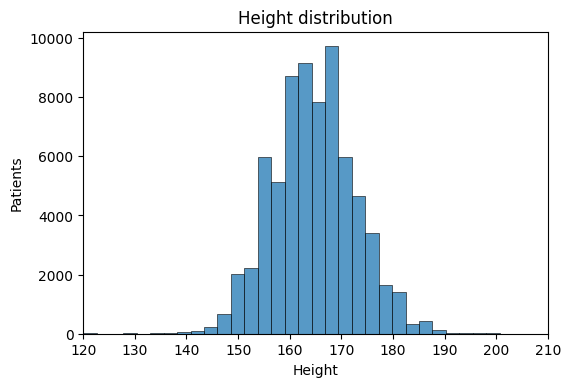

In [7]:
ax, fig = plt.subplots(dpi = 100)
ax = sns.histplot(df_disease_prediction["height"], bins=75)
ax.set(xlim=[120, 210], title = "Height distribution", xlabel = "Height", ylabel = "Patients");

g)

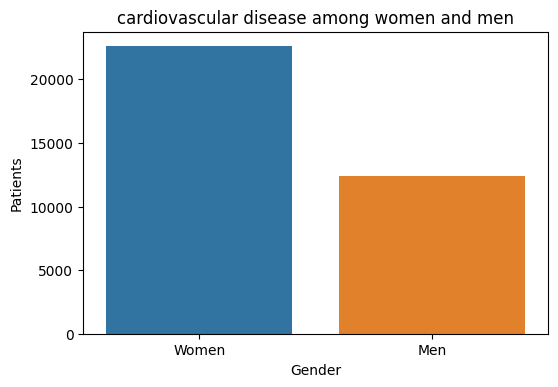

In [8]:
CD_gender = df_disease_prediction[df_disease_prediction["cardio"] == 1]["gender"].value_counts()

fig, ax = plt.subplots(dpi = 100)
ax = sns.barplot(x = CD_gender.index, y = CD_gender)
ax.set_xticks(range(len(CD_gender)), labels = ["Women", "Men"])
ax.set(title = "cardiovascular disease among women and men", xlabel = "Gender", ylabel = "Patients");

## 2.1.0 - Feature engineering BMI

In [9]:
df_disease_prediction["bmi"] = round(df_disease_prediction["weight"] / np.square(df_disease_prediction["height"] / 100), 1)

a)

According to https://en.wikipedia.org/wiki/Body_mass_index a BMI under 16 is servere thinness so I will see if the heights and weights seems probable for anyone with a BMI under 16. The same wiki page also stats that Obese class III is a BMI higher than 40.

In [10]:
print(len(df_disease_prediction[df_disease_prediction["bmi"] < 16]))
df_disease_prediction[df_disease_prediction["bmi"] < 16]

57


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
2862,4029,20707,1,184,52.0,120,80,1,1,0,0,0,1,15.4
3237,4561,16072,2,198,61.0,110,70,1,1,0,0,1,1,15.6
3533,5006,16644,1,165,43.0,90,60,1,2,0,0,1,0,15.8
5362,7634,16755,1,167,41.0,110,80,1,1,0,0,1,0,14.7
6486,9223,21220,1,250,86.0,140,100,3,1,0,0,1,1,13.8
9487,13518,20958,2,172,40.0,140,90,1,2,0,0,1,1,13.5
10447,14908,22007,1,162,38.0,100,70,1,1,0,0,1,0,14.5
10627,15182,21669,1,153,37.0,150,80,3,3,0,0,1,1,15.8
11876,16963,17512,1,157,39.0,90,70,1,1,0,0,1,0,15.8
12486,17830,17540,1,176,48.0,110,70,1,1,1,0,1,0,15.5


Even the ones closest to 16 seems unresonable, such as id 94034 which has a BMI of 15.9 and is supposedly 179cm tall and weights 51kg. I will therefore remove all samples with a BMI under 16.

In [11]:
df_disease_prediction[df_disease_prediction["bmi"] > 40]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
30,42,18291,1,155,105.0,120,80,3,1,0,0,1,1,43.7
46,61,18207,1,162,107.0,150,90,2,1,0,0,1,1,40.8
83,114,19570,1,152,110.0,160,90,1,1,0,0,1,1,47.6
88,121,23204,1,151,92.0,130,90,1,1,0,0,0,1,40.3
224,309,21800,2,76,55.0,120,80,1,1,0,0,1,0,95.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69588,99399,18864,1,155,101.0,140,80,3,2,0,0,1,1,42.0
69708,99562,21357,1,144,115.0,140,90,1,1,0,1,0,1,55.5
69946,99925,21333,1,164,115.0,130,80,1,1,0,0,1,1,42.8
69985,99977,18194,1,156,102.0,130,80,1,1,0,1,0,1,41.9


When checking for a BMI higher than 40 I found 1846 samples, and since there are argubly a lot more obese people than servere thinn people I will raise the threshold for higher BMI.

In [12]:
bmi_over_55 = df_disease_prediction[df_disease_prediction["bmi"] > 55]
print(f"Number of samples: {len(bmi_over_55)}")
print(f"Mean bmi: {bmi_over_55['bmi'].mean():.1f}")

Number of samples: 136
Mean bmi: 82.9


There are 136 samples with a BMI higher than 55 and the mean BMI for those are 82.9 which is unreasonably high and I will remove every sample with a BMI higher than 55.

In [13]:
to_remove = df_disease_prediction[(df_disease_prediction["bmi"] > 55) | (df_disease_prediction["bmi"] < 16)].index
df_disease_prediction = df_disease_prediction[~df_disease_prediction.index.isin(to_remove)].reset_index(drop=True)

b)

In [14]:
# creating bmi_category column
df_disease_prediction["bmi_category"] = 0

# assigning values based on https://en.wikipedia.org/wiki/Body_mass_index
bmi_categories = [25, 30, 35, 40]
for value, category in enumerate(bmi_categories, 1):
    df_disease_prediction.loc[df_disease_prediction["bmi"] >= category, "bmi_category"] = value

df_disease_prediction.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9,2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,0


bmi_category values:

0 = Normal range,
1 = Overweight,
2 = Obese (class I),
3 = Obese (class II),
4 = Obese (class III)

## 2.1.1 - Feature engineering blood pressure

Using this source https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/blood-pressure I'm excluding diastolic values lower than 60

For the upper limit of diastolic I can see that the 5th category found on https://www.healthline.com/health/high-blood-pressure-hypertension#symptoms is 120 and over, I will check how many there are at > 120 and then decide where to exclude samples.

In [15]:
print(f"There are {len(df_disease_prediction[df_disease_prediction['ap_lo'] < 60])} samples with lower than 60 diastolic pressure ")

There are 174 samples with lower than 60 diastolic pressure 


In [16]:
print(f"There are {len(df_disease_prediction[df_disease_prediction['ap_lo'] > 120])} samples with 120 or higher disatolic pressure")
print(f"There are {len(df_disease_prediction[df_disease_prediction['ap_lo'] > 180])} samples with 180 or higher disatolic pressure")
print(f"There are {len(df_disease_prediction[df_disease_prediction['ap_lo'] > 200])} samples with 200 or higher disatolic pressure")

There are 1050 samples with 120 or higher disatolic pressure
There are 951 samples with 180 or higher disatolic pressure
There are 948 samples with 200 or higher disatolic pressure


Since the differance between 120 and 180 is just 101 samples I will assume that the outliers are well above that and I will exclude samples higher than 180.

In [17]:
to_remove = df_disease_prediction[(df_disease_prediction['ap_lo'] < 60) | (df_disease_prediction['ap_lo'] > 180)].index
df_disease_prediction = df_disease_prediction[~df_disease_prediction.index.isin(to_remove)]

I use the same source as above (https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/blood-press) and check for systolic preassures below 90.

In [18]:
print(f"There are {len(df_disease_prediction[df_disease_prediction['ap_hi'] < 100])} samples with lower than 100 systolic pressure")
print(f"There are {len(df_disease_prediction[df_disease_prediction['ap_hi'] < 90])} samples with lower than 90 systolic pressure")
print(f"There are {len(df_disease_prediction[df_disease_prediction['ap_hi'] < 80])} samples with lower than 80 systolic pressure")

There are 1282 samples with lower than 100 systolic pressure
There are 294 samples with lower than 90 systolic pressure
There are 190 samples with lower than 80 systolic pressure


The differance between the samples under 100 and under 90 is about 1000 samples but the differance between 90 and 80 is just 100 samples and I will assume that there are legit samples between 90 and 100, therefore I will exclude the samples below 90.

In [19]:
print(f"There are {len(df_disease_prediction[df_disease_prediction['ap_hi'] > 180])} samples with higher than 180 systolic pressure")
print(f"There are {len(df_disease_prediction[df_disease_prediction['ap_hi'] > 200])} samples with higher than 200 systolic pressure")
print(f"There are {len(df_disease_prediction[df_disease_prediction['ap_hi'] > 220])} samples with higher than 220 systolic pressure")
print(f"There are {len(df_disease_prediction[df_disease_prediction['ap_hi'] > 240])} samples with higher than 240 systolic pressure")

There are 313 samples with higher than 180 systolic pressure
There are 85 samples with higher than 200 systolic pressure
There are 41 samples with higher than 220 systolic pressure
There are 33 samples with higher than 240 systolic pressure


In [20]:
print(f"There are {len(df_disease_prediction[df_disease_prediction['ap_hi'] > 180])} samples with higher than 180 systolic pressure")

There are 313 samples with higher than 180 systolic pressure


As the 5th category should be 180 and above I will exclude samples above 220 so that the category still has some samples left.

In [21]:
to_remove = df_disease_prediction[(df_disease_prediction['ap_hi'] < 90) | (df_disease_prediction['ap_hi'] > 220)].index
df_disease_prediction = df_disease_prediction[~df_disease_prediction.index.isin(to_remove)]

In [22]:
# ceating bp_category column
df_disease_prediction["bp_category"] = 0

# assigning category basted on blood pressure ranges from https://www.healthline.com/health/high-blood-pressure-hypertension#definition
df_disease_prediction.loc[((df_disease_prediction["ap_hi"] >= 120) & (df_disease_prediction["ap_hi"] <= 129)) & (df_disease_prediction["ap_lo"] < 80), "bp_category"] = 1
df_disease_prediction.loc[((df_disease_prediction["ap_hi"] >= 130) & (df_disease_prediction["ap_hi"] <= 139)) | ((df_disease_prediction["ap_lo"] >= 80) & (df_disease_prediction["ap_lo"] <= 89)), "bp_category"] = 2
df_disease_prediction.loc[(df_disease_prediction["ap_hi"] >= 140) | (df_disease_prediction["ap_lo"] >= 90), "bp_category"] = 3
df_disease_prediction.loc[(df_disease_prediction["ap_hi"] > 180) | (df_disease_prediction["ap_lo"] > 120), "bp_category"] = 4

bp_category values:

Healthy = 0,
Elevated = 1,
Stage 1 hypertension = 2,
Stage 2 hypertension = 3,
Hypertension crisis = 4

## 2.2.0 - Visualizations for proportion of diseases

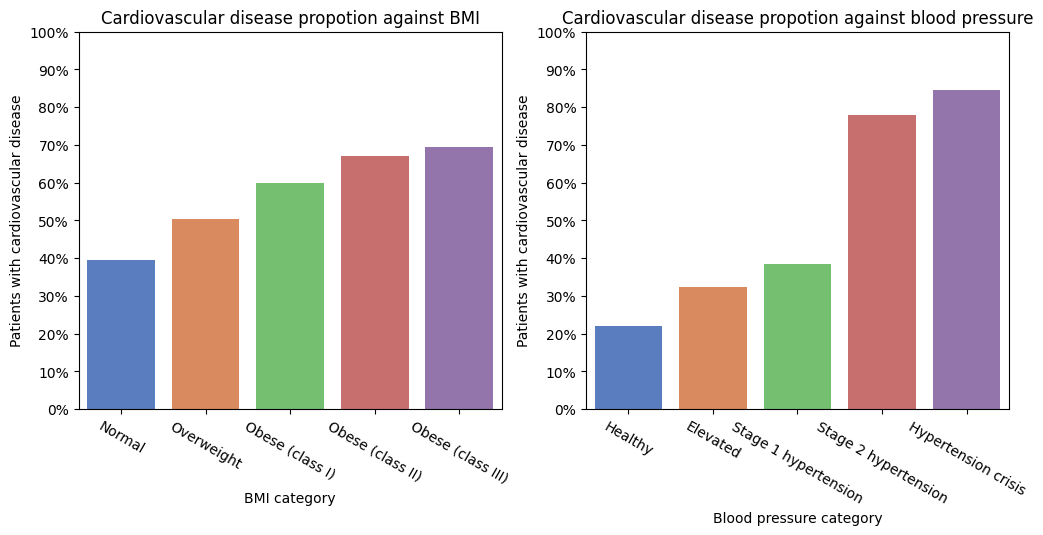

In [23]:
bmi_disease = df_disease_prediction[df_disease_prediction["cardio"] == 1]["bmi_category"].value_counts() / df_disease_prediction["bmi_category"].value_counts()
bmi_disease_labels = ["Normal", "Overweight", "Obese (class I)", "Obese (class II)", "Obese (class III)"]

bp_disease = df_disease_prediction[df_disease_prediction["cardio"] == 1]["bp_category"].value_counts() / df_disease_prediction["bp_category"].value_counts()
bp_disease_labels = ["Healthy", "Elevated", "Stage 1 hypertension", "Stage 2 hypertension", "Hypertension crisis"]

fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 100)

sns.barplot(y = bmi_disease, x = bmi_disease.index, ax  =ax[0], palette = sns.color_palette('muted'))
ax[0].set_xticks(range(5), labels = bmi_disease_labels, rotation = -30)
ax[0].set(title = "Cardiovascular disease propotion against BMI", xlabel = "BMI category", ylabel = "Patients with cardiovascular disease")
ax[0].set_yticks(np.arange(0, 1.1, 0.1))
ax[0].yaxis.set_major_formatter('{x:.0%}')

sns.barplot(y = bp_disease, x = bp_disease.index, ax = ax[1], palette = sns.color_palette('muted'))
ax[1].set_xticks(range(5), labels = bp_disease_labels, rotation = -30)
ax[1].set(title = "Cardiovascular disease propotion against blood pressure", xlabel = "Blood pressure category", ylabel = "Patients with cardiovascular disease")
ax[1].set_yticks(np.arange(0, 1.1, 0.1))
ax[1].yaxis.set_major_formatter('{x:.0%}')

## 2.2.1 - Visualizations for correlation

[Text(0.5, 1.0, 'Feature heatmap')]

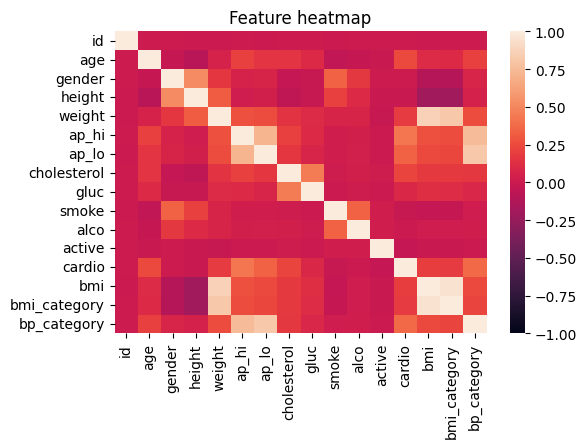

In [24]:
fig, ax = plt.figure(dpi = 100), plt.axes()
ax = sns.heatmap(df_disease_prediction.corr(), vmin = -1, vmax = 1)
ax.set(title = "Feature heatmap")


BMI/BMI_category and weight are positive correlated, which is obvious because BMI is calculated based on weight and height.

BMI/BMI_category are negative correlated to height which makes sense because of how BMI is calculated as stated above.

BMI and BMI_category are positive correlated because BMI_category is just BMI split up into 5 categories.

BP_category is positive correlated to ap_hi and ap_low because BP_category is based on the values in ap_hi and ap_low.

## 2.3 Create two data sets

In [25]:
# copy of dataframe
df_disease_prediction_2 = df_disease_prediction.copy()

In [26]:
# dropping "ap_hi", "ap_lo", "height", "weight", "bmi" and "id" columns. 
# I've chosen to drop ID as well since it doesn't have anything to do with cardiovascular diseases.
df_disease_prediction = df_disease_prediction.drop(["ap_hi", "ap_lo", "height", "weight", "bmi", "id"], axis = 1)
df_disease_prediction.head()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi_category,bp_category
0,18393,2,1,1,0,0,1,0,0,2
1,20228,1,3,1,0,0,1,1,2,3
2,18857,1,3,1,0,0,0,1,0,2
3,17623,2,1,1,0,0,1,1,1,3
4,17474,1,1,1,0,0,0,0,0,0


In [27]:
# one-hot encoding
df_disease_prediction["gender"] = pd.get_dummies(df_disease_prediction["gender"], drop_first=True)

bmi_category_one_hot = pd.get_dummies(df_disease_prediction["bmi_category"], drop_first=True)
bmi_category_one_hot.columns = ["bmi_1", "bmi_2", "bmi_3", "bmi_4"]

bp_category_one_hot = pd.get_dummies(df_disease_prediction["bp_category"], drop_first=True)
bp_category_one_hot.columns = ["bp_1", "bp_2", "bp_3", "bp_4"]

df_disease_prediction.drop(["bmi_category", "bp_category"], axis=1, inplace=True)

In [28]:
df_disease_prediction = df_disease_prediction.join(bmi_category_one_hot)
df_disease_prediction = df_disease_prediction.join(bp_category_one_hot)

df_disease_prediction.head()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi_1,bmi_2,bmi_3,bmi_4,bp_1,bp_2,bp_3,bp_4
0,18393,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0
1,20228,0,3,1,0,0,1,1,0,1,0,0,0,0,1,0
2,18857,0,3,1,0,0,0,1,0,0,0,0,0,1,0,0
3,17623,1,1,1,0,0,1,1,1,0,0,0,0,0,1,0
4,17474,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# dropping "bmi_category", "bp_category", "height", "weight" and "id" columns
df_disease_prediction_2 = df_disease_prediction_2.drop(["bmi_category", "bp_category", "height", "weight", "id"], axis = 1)

# one-hot encoding gender column
df_disease_prediction_2["gender"] = pd.get_dummies(df_disease_prediction_2["gender"], drop_first=True)

df_disease_prediction_2.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,1,110,80,1,1,0,0,1,0,22.0
1,20228,0,140,90,3,1,0,0,1,1,34.9
2,18857,0,130,70,3,1,0,0,0,1,23.5
3,17623,1,150,100,1,1,0,0,1,1,28.7
4,17474,0,100,60,1,1,0,0,0,0,23.0


## 2.4 Choose model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
# train|validation|test on data set 1
X_1, y_1 = df_disease_prediction.drop("cardio", axis = 1), df_disease_prediction["cardio"]
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.15, random_state=42)
X_1_train_2, X_1_validation, y_1_train_2, y_1_validation = train_test_split(X_1_train, y_1_train, test_size=0.2, random_state=42)

# train|validation|test on data set 2
X_2, y_2 = df_disease_prediction_2.drop("cardio", axis = 1), df_disease_prediction["cardio"]
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.15, random_state=42)
X_2_train_2, X_2_validation, y_2_train_2, y_2_validation = train_test_split(X_2_train, y_2_train, test_size=0.2, random_state=42)

In [32]:
# pipeline creation function
def pipeline(scaler, model, model_name):
    return Pipeline([
        ("scaler", scaler),
        (model_name, model)
    ])

In [33]:
# evaluation function that returns recall score and model
def evaluate_model(pipeline, param_grid, X_train, y_train, X_validation, y_validation):
    model_GS = GridSearchCV(
        estimator = pipeline,
        scoring = "recall",
        param_grid = param_grid,
        verbose = 1
    )

    model_GS.fit(X_train, y_train)
    y_pred = model_GS.predict(X_validation)

    scoring = recall_score(y_validation, y_pred)

    return [scoring, model_GS]

### Decision tree

In [34]:
param_grid_dt = dict(
    dt__max_depth = range(1, 11),
    dt__criterion = ["gini", "entropy"],
    dt__min_samples_split = [2, 5, 10],
    dt__min_samples_leaf = [1, 2, 3]
    )

# Note: scaler does not matter for decision tree but I made the function to use a scaler
dt_evaluate_1 = evaluate_model(pipeline(MinMaxScaler(), DecisionTreeClassifier(), "dt"),
                        param_grid_dt, 
                        X_1_train_2, y_1_train_2, 
                        X_1_validation, 
                        y_1_validation)

dt_evaluate_2 = evaluate_model(pipeline(MinMaxScaler(), DecisionTreeClassifier(), "dt"),
                        param_grid_dt, 
                        X_2_train_2, y_2_train_2,
                        X_2_validation, 
                        y_2_validation)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Fitting 5 folds for each of 180 candidates, totalling 900 fits


### Random forest

In [35]:
param_grid_rf = dict(
    rf__n_estimators = [50, 100, 150],
    rf__criterion = ["gini", "entropy"],
    rf__max_features = ["auto", "sqrt", "log2"]
    )

rf_evaluate_1 = evaluate_model(pipeline(MinMaxScaler(), RandomForestClassifier(), "rf"),
                        param_grid_rf, 
                        X_1_train_2, y_1_train_2, 
                        X_1_validation, 
                        y_1_validation)

rf_evaluate_2 = evaluate_model(pipeline(MinMaxScaler(), RandomForestClassifier(), "rf"),
                        param_grid_rf, 
                        X_2_train_2, y_2_train_2,
                        X_2_validation, 
                        y_2_validation)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


### Naive Bayes Categorical

In [36]:
param_grid_nb = dict(
    nb__alpha = np.linspace(0.0001, 1, 50),
    nb__fit_prior = [True, False]
    )

nb_evaluate_1 = evaluate_model(pipeline(MinMaxScaler(), CategoricalNB(), "nb"),
                        param_grid_nb, 
                        X_1_train_2, y_1_train_2,
                        X_1_validation, 
                        y_1_validation)

nb_evaluate_2 = evaluate_model(pipeline(MinMaxScaler(), CategoricalNB(), "nb"),
                        param_grid_nb, 
                        X_2_train_2, y_2_train_2,
                        X_2_validation, 
                        y_2_validation)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


### Logistic

In [37]:
param_grid_logistic = dict(
    logistic__C = np.linspace(0.01, 1, 5),
    logistic__l1_ratio = np.linspace(0, 1, 10)
)

logistic_evaluate_1 = evaluate_model(pipeline(StandardScaler(), 
                                                LogisticRegression(solver = "saga", 
                                                                   penalty = "elasticnet"), 
                                                "logistic"),
                        param_grid_logistic, 
                        X_1_train_2, y_1_train_2,
                        X_1_validation, 
                        y_1_validation)

logistic_evaluate_2 = evaluate_model(pipeline(StandardScaler(), 
                                                LogisticRegression(solver = "saga", 
                                                                   penalty = "elasticnet"), 
                                                "logistic"),
                        param_grid_logistic, 
                        X_2_train_2, y_2_train_2,
                        X_2_validation, 
                        y_2_validation)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


### K-nearest neighbor

In [38]:
param_grid_KNN = dict(
    KNN__n_neighbors = range(1,11),
    KNN__p = [1, 2],
)

KNN_evaluate_1 = evaluate_model(pipeline(StandardScaler(), KNeighborsClassifier(), "KNN"),
                        param_grid_KNN, 
                        X_1_train_2, y_1_train_2,
                        X_1_validation, 
                        y_1_validation)

KNN_evaluate_2 = evaluate_model(pipeline(StandardScaler(), KNeighborsClassifier(), "KNN"),
                        param_grid_KNN, 
                        X_2_train_2, y_2_train_2,
                        X_2_validation, 
                        y_2_validation)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [39]:
# function to add a row to evaluation dataframe
def add_to_evaluation_df(df, data_set, model, scaler, recall_score):
    new_row = pd.DataFrame([[data_set, model, scaler, round(recall_score, 3)]], columns = df.columns)
    df = pd.concat((df, new_row), axis=0).reset_index(drop=True)
    return df

In [40]:
evalution_df = pd.DataFrame(columns = ["Data set", "Model", "Scaler", "Recall score"])

# decision tree
evalution_df = add_to_evaluation_df(evalution_df, 1, dt_evaluate_1[1].best_estimator_[1], dt_evaluate_1[1].best_estimator_[0], dt_evaluate_1[0])
evalution_df = add_to_evaluation_df(evalution_df, 2, dt_evaluate_2[1].best_estimator_[1], dt_evaluate_2[1].best_estimator_[0], dt_evaluate_2[0])

# random forest
evalution_df = add_to_evaluation_df(evalution_df, 1, rf_evaluate_1[1].best_estimator_[1], rf_evaluate_1[1].best_estimator_[0], rf_evaluate_1[0])
evalution_df = add_to_evaluation_df(evalution_df, 2, rf_evaluate_2[1].best_estimator_[1], rf_evaluate_2[1].best_estimator_[0], rf_evaluate_2[0])

# naive bayes
evalution_df = add_to_evaluation_df(evalution_df, 1, nb_evaluate_1[1].best_estimator_[1], nb_evaluate_1[1].best_estimator_[0], nb_evaluate_1[0])
evalution_df = add_to_evaluation_df(evalution_df, 2, nb_evaluate_2[1].best_estimator_[1], nb_evaluate_2[1].best_estimator_[0], nb_evaluate_2[0])

# logistic
evalution_df = add_to_evaluation_df(evalution_df, 1, logistic_evaluate_1[1].best_estimator_[1], logistic_evaluate_1[1].best_estimator_[0], logistic_evaluate_1[0])
evalution_df = add_to_evaluation_df(evalution_df, 2, logistic_evaluate_2[1].best_estimator_[1], logistic_evaluate_2[1].best_estimator_[0], logistic_evaluate_2[0])

# KNN
evalution_df = add_to_evaluation_df(evalution_df, 1, KNN_evaluate_1[1].best_estimator_[1], KNN_evaluate_1[1].best_estimator_[0], KNN_evaluate_1[0])
evalution_df = add_to_evaluation_df(evalution_df, 2, KNN_evaluate_2[1].best_estimator_[1], KNN_evaluate_2[1].best_estimator_[0], KNN_evaluate_2[0])

evalution_df

,Data set,Model,Scaler,Recall score
0,1,"DecisionTreeClassifier(max_depth=6, min_sample...",MinMaxScaler(),0.701
1,2,"DecisionTreeClassifier(criterion='entropy', ma...",MinMaxScaler(),0.723
2,1,"(DecisionTreeClassifier(max_features='auto', r...",MinMaxScaler(),0.627
3,2,"(DecisionTreeClassifier(max_features='sqrt', r...",MinMaxScaler(),0.687
4,1,"CategoricalNB(alpha=0.0001, fit_prior=False)",MinMaxScaler(),0.596
5,2,"CategoricalNB(alpha=0.0001, fit_prior=False)",MinMaxScaler(),0.256
6,1,"LogisticRegression(C=0.7525, l1_ratio=0.111111...",StandardScaler(),0.639
7,2,"LogisticRegression(C=0.01, l1_ratio=0.11111111...",StandardScaler(),0.659
8,1,"KNeighborsClassifier(n_neighbors=9, p=1)",StandardScaler(),0.684
9,2,"KNeighborsClassifier(n_neighbors=9, p=1)",StandardScaler(),0.687


I will choose decision tree with criterion "entropy", max_depth = 4, min_samples_leaf = 1 and min_samples_split = 2 on dataset 2.

In [41]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, min_samples_leaf = 1, min_samples_split = 2)
model.fit(X_2_train, y_2_train);

## 2.5 Ensamble

In [42]:
from sklearn.ensemble import VotingClassifier

vote_classifier = VotingClassifier([
    ("dt", DecisionTreeClassifier(criterion = "entropy", max_depth = 4, min_samples_leaf = 1, min_samples_split = 2)),
    ("rf", RandomForestClassifier(criterion = "gini",max_features = "auto", n_estimators = 150)),
    ("nb", CategoricalNB(alpha = 0.0001, fit_prior = False)),
    ("logistic", LogisticRegression(solver = "saga", penalty = "elasticnet", C = 0.01, l1_ratio = 0.0, max_iter = 10000)),
    ("KNN", KNeighborsClassifier(n_neighbors = 9, p = 1))
], voting="soft")

vote_classifier.fit(X_2_train, y_2_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=4)),
                             ('rf', RandomForestClassifier(n_estimators=150)),
                             ('nb',
                              CategoricalNB(alpha=0.0001, fit_prior=False)),
                             ('logistic',
                              LogisticRegression(C=0.01, l1_ratio=0.0,
                                                 max_iter=10000,
                                                 penalty='elasticnet',
                                                 solver='saga')),
                             ('KNN', KNeighborsClassifier(n_neighbors=9, p=1))],
                 voting='soft')

## 2.6 Evaluation

In [53]:
def evaluate(model):
    y_pred = model.predict(X_2_test)
    print(classification_report(y_2_test, y_pred))
    cm = confusion_matrix(y_2_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"]).plot()

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      5182
           1       0.73      0.72      0.72      5071

    accuracy                           0.73     10253
   macro avg       0.73      0.73      0.73     10253
weighted avg       0.73      0.73      0.73     10253



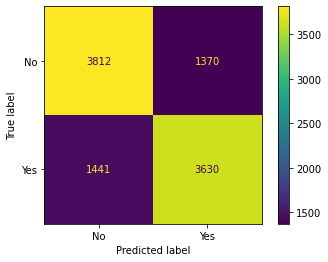

In [54]:
evaluate(model)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      5182
           1       0.84      0.77      0.80      5071

    accuracy                           0.81     10253
   macro avg       0.82      0.81      0.81     10253
weighted avg       0.82      0.81      0.81     10253



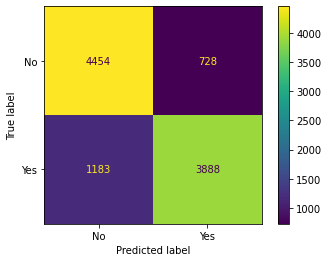

In [55]:
evaluate(vote_classifier)

## 2.7 "Delpoy" - save model

Selecting 100 random samples

In [56]:
df_disease_prediction_2 = df_disease_prediction_2.reset_index(drop=True)
np.random.seed(42)
random_index = np.random.randint(1, len(df_disease_prediction_2), 100)
samples = df_disease_prediction_2.iloc[random_index].reset_index(drop=True)
samples.to_csv("test_samples.csv")

Creating new trainig data without the 100 samples above and fitting model, I chose vote_classifier because the recall score for 0 (no cardiovascular disease) was higher.

In [47]:
training_data = df_disease_prediction_2[~df_disease_prediction_2.index.isin(random_index)]
X, y = training_data.drop("cardio", axis = 1), training_data["cardio"]

model_to_deploy = vote_classifier.fit(X, y)

In [63]:
import joblib

joblib.dump(model_to_deploy, "model.pkl", compress = 8)

['model.pkl']